- This notebook is to analysis microscopy images for the third round experiment

In [2]:
import os

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from microscopy.batch_run import run_batch_files_templates
from microscopy.utils import *

In [4]:
template1 = np.load('../../data/Templates_microscopy/template_656, 640, 71, 71.npy')
template2 = np.load('../../data/Templates_microscopy/Project_Whole Plate1_1024x1024_200Hz_1%Laser_800gain_B_5_R1.tif_enhance_482_20_56_56.npy')

templates = [template1, template2]

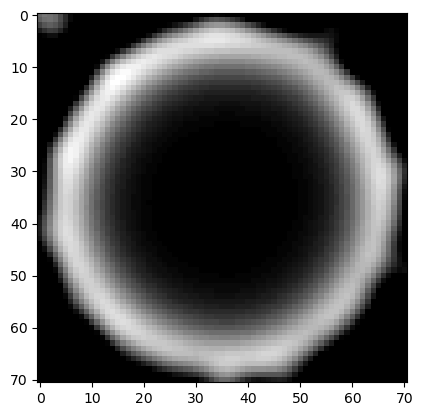

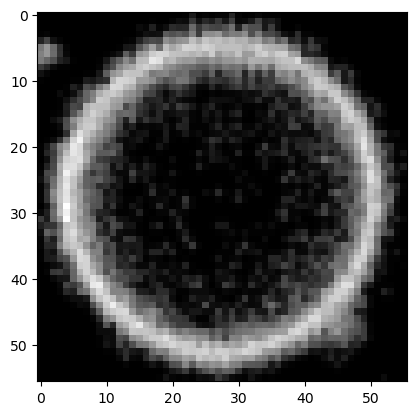

In [5]:
for template in templates:
    plt.imshow(template, cmap='gray')
    plt.show()

In [11]:
file_folder='../../data/Microscopy/20251106_PFAS'

In [12]:
PlateName='Plate_20251107'
folder_path = f"Results_{PlateName}"
os.makedirs(folder_path, exist_ok=True)
# Record the start time
import time
start_time = time.time()
run_batch_files_templates(file_folder, templates, PlateName, \
                min_scale=0.3, max_scale=4, intervals=100, threshold = 0.5, Preprocess=False)

# Record the end time
end_time = time.time()

# Calculate the running time
running_time = end_time - start_time

print("Script execution time:", running_time, "seconds")

61 vesicles found
WellF10_PointF10_0003_ChannelNile Red_Seq0291.ome.tiff
3 vesicles found
WellD15_PointD15_0003_ChannelNile Red_Seq0111.ome.tiff
117 vesicles found
WellE17_PointE17_0002_ChannelNile Red_Seq0218.ome.tiff
1 vesicles found
WellE14_PointE14_0002_ChannelNile Red_Seq0206.ome.tiff
None vesicles found
WellC08_PointC08_0001_ChannelNile Red_Seq0021.ome.tiff
None vesicles found
WellC21_PointC21_0003_ChannelNile Red_Seq0075.ome.tiff
None vesicles found
WellD13_PointD13_0001_ChannelNile Red_Seq0117.ome.tiff
None vesicles found
WellC21_PointC21_0000_ChannelNile Red_Seq0072.ome.tiff
None vesicles found
WellC03_PointC03_0000_ChannelNile Red_Seq0000.ome.tiff
92 vesicles found
WellE19_PointE19_0002_ChannelNile Red_Seq0226.ome.tiff
71 vesicles found
WellD06_PointD06_0000_ChannelNile Red_Seq0144.ome.tiff
None vesicles found
WellG04_PointG04_0001_ChannelNile Red_Seq0325.ome.tiff
2 vesicles found
WellF05_PointF05_0002_ChannelNile Red_Seq0310.ome.tiff
None vesicles found
WellF20_PointF20_0001

In [15]:
df = pd.read_csv('../../results/Results_Plate_20251107/Plate_20251107_VesiclesSummary.csv')
df

,filename,num_vesicles,area_vesicles,area_percent
0,WellF10_PointF10_0003_ChannelNile Red_Seq0291....,61,152190.529112,0.145140
1,WellD15_PointD15_0003_ChannelNile Red_Seq0111....,3,4990.419930,0.004759
2,WellE17_PointE17_0002_ChannelNile Red_Seq0218....,117,167293.735794,0.159544
3,WellE14_PointE14_0002_ChannelNile Red_Seq0206....,1,346.360590,0.000330
4,WellC08_PointC08_0001_ChannelNile Red_Seq0021....,0,0.000000,0.000000
...,...,...,...,...
355,WellF18_PointF18_0002_ChannelNile Red_Seq0258....,0,0.000000,0.000000
356,WellC07_PointC07_0000_ChannelNile Red_Seq0016....,32,17618.836999,0.016803
357,WellD05_PointD05_0000_ChannelNile Red_Seq0148....,64,159783.758556,0.152382
358,WellE09_PointE09_0003_ChannelNile Red_Seq0187....,21,17699.733010,0.016880


In [16]:
df_sorted = df.sort_values(by='filename')

# Extract the part before the first '_' in 'filename'
df_sorted['group'] = df_sorted['filename'].str.split('_').str[0]

# Group by 'group', take median of other columns, and keep the first row
df_final = df_sorted.groupby('group').agg({
    'filename': 'first',
    'num_vesicles': 'median',
    'area_vesicles': 'median',
    'area_percent': 'median'
}).reset_index(drop=True)

# Round num_vesicles to integer
df_final['num_vesicles'] = df_final['num_vesicles'].round().astype(int)

df_final['position'] = df_final['filename'].str.extract(r'Well([A-Z]+\d+)_')

# Dropping the original filename column
df_final = df_final[['position', 'num_vesicles', 'area_vesicles', 'area_percent']]
df_final

,position,num_vesicles,area_vesicles,area_percent
0,C03,0,0.000000,0.000000
1,C04,6,6651.929745,0.006344
2,C05,14,8238.434035,0.007857
3,C06,4,3702.759641,0.003531
4,C07,20,10531.403973,0.010044
...,...,...,...,...
85,G08,48,101629.344246,0.096921
86,G09,48,96253.686517,0.091795
87,G10,106,184167.622636,0.175636
88,G11,64,251270.078221,0.239630


In [20]:
df_final.to_csv('df_final_exp3.csv', index=False)

In [19]:
df_name = pd.read_csv('../../data/Intermediate/names_exp3.csv')
df_name

,names
0,sample240_fmvsgp_0
1,sample240_fmvsgp_1
2,sample240_fmvsgp_2
3,sample240_fmvsgp_3
4,sample240_fmvsgp_4
5,sample240_fmvsgp_5
6,sample240_fmvsgp_6
7,sample144_ori_0
8,sample144_ori_1
9,sample144_ori_2


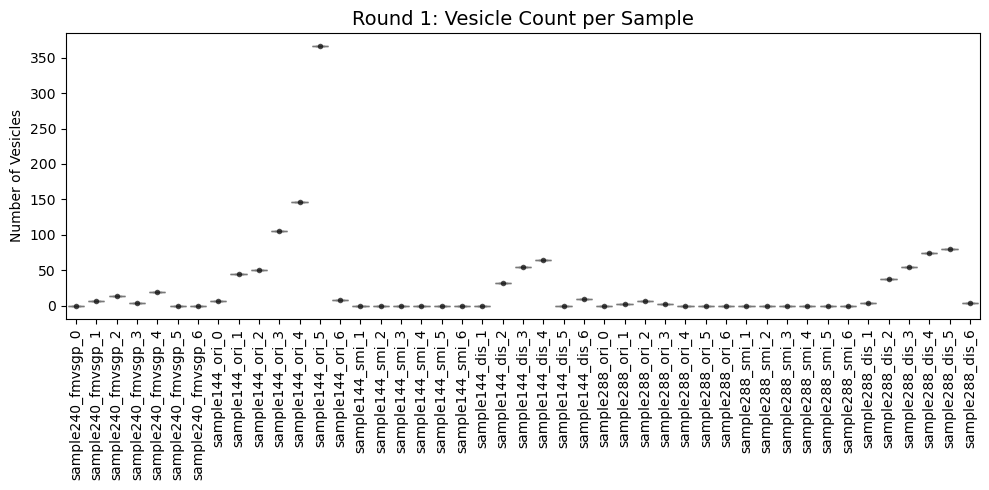

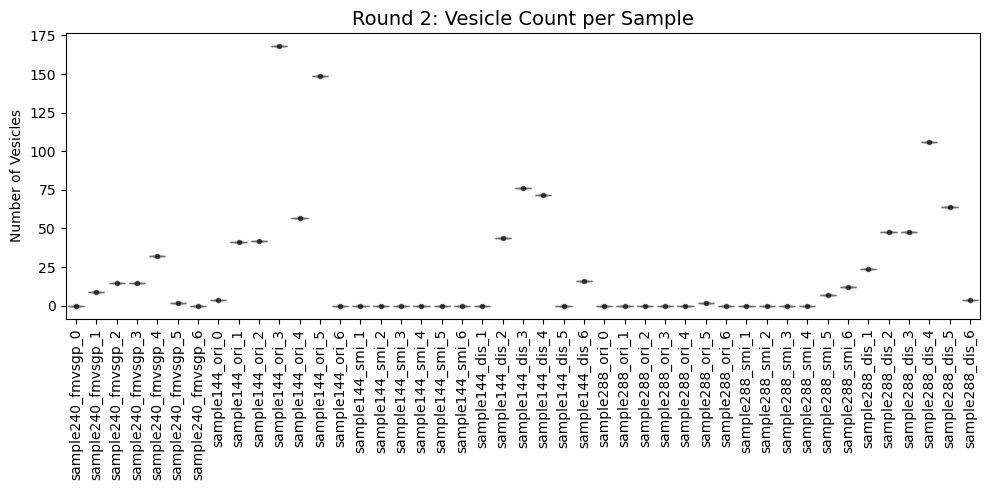

In [22]:
df_final["names"] = df_name["names"].tolist() * 2

# Split into two halves
df_first = df_final.iloc[:45].copy()
df_second = df_final.iloc[45:].copy()

#  first replicate
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_first,
            x=pd.Categorical(df_first["names"], categories=df_name["names"], ordered=True),
            y="num_vesicles", color="lightblue")
sns.stripplot(data=df_first,
              x=pd.Categorical(df_first["names"], categories=df_name["names"], ordered=True),
              y="num_vesicles", color="black", size=4, alpha=0.7)
plt.title("Round 1: Vesicle Count per Sample", fontsize=14)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("Number of Vesicles")
plt.tight_layout()
plt.show()

# second replicate
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_second,
            x=pd.Categorical(df_second["names"], categories=df_name["names"], ordered=True),
            y="num_vesicles", color="lightgreen")
sns.stripplot(data=df_second,
              x=pd.Categorical(df_second["names"], categories=df_name["names"], ordered=True),
              y="num_vesicles", color="black", size=4, alpha=0.7)
plt.title("Round 2: Vesicle Count per Sample", fontsize=14)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("Number of Vesicles")
plt.tight_layout()
plt.show()

In [29]:
# FM vs GP

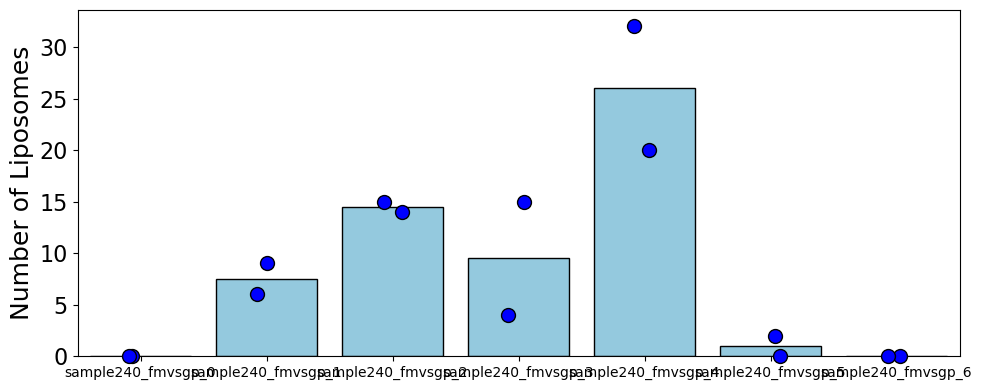

In [83]:
order = df_name["names"].iloc[:7].values.tolist()
df_plot = df_final[df_final["names"].isin(order)].copy()

# Compute average per sample
df_avg = df_plot.groupby("names", as_index=False)["num_vesicles"].mean()

plt.figure(figsize=(10, 4))

# Bar plot for average
sns.barplot(
    data=df_avg,
    x=pd.Categorical(df_avg["names"], categories=order, ordered=True),
    y="num_vesicles",
    color="skyblue",
    edgecolor="k"
)

sns.stripplot(
    data=df_plot,
    x=pd.Categorical(df_plot["names"], categories=order, ordered=True),
    y="num_vesicles",
    size=10,
    color="blue",
    edgecolor="k",
    jitter=True,
    linewidth=1,
    clip_on=False
)

plt.ylabel("Number of Liposomes", fontsize=18)
plt.xlabel("")
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig("../../results/fm_vs_gp.png", dpi=600, bbox_inches="tight")
plt.show()

In [ ]:
# The other 2 mixture system

In [ ]:
# Filter for sample144 names
sample144_names = df_name[df_name["names"].str.contains("sample144")]["names"].tolist()
df_plot = df_final[df_final["names"].isin(sample144_names)].copy()

# Assign type based on name
def sample_type(name):
    if "ori" in name:
        return "ori"
    elif "smi" in name:
        return "smi"
    elif "dis" in name:
        return "dis"
    else:
        return "other"

df_plot["type"] = df_plot["names"].apply(sample_type)

In [ ]:
df_plot = df_plot.copy()
df_plot["sample_index"] = df_plot["names"].str.extract(r"_(\d+)$").astype(int)

# Types and sample indices
type_order = ["ori", "smi", "dis"]
sample_order = sorted(df_plot["sample_index"].unique())  # e.g. [0,1,...,6]

# Compute mean vesicle count per sample_index & type
df_avg = df_plot.groupby(["sample_index", "type"], as_index=False)["num_vesicles"].mean()

full_index = pd.MultiIndex.from_product([sample_order, type_order], names=["sample_index", "type"])
df_avg_full = df_avg.set_index(["sample_index", "type"]).reindex(full_index).reset_index()

df_avg_full["num_vesicles"] = df_avg_full["num_vesicles"].fillna(0)

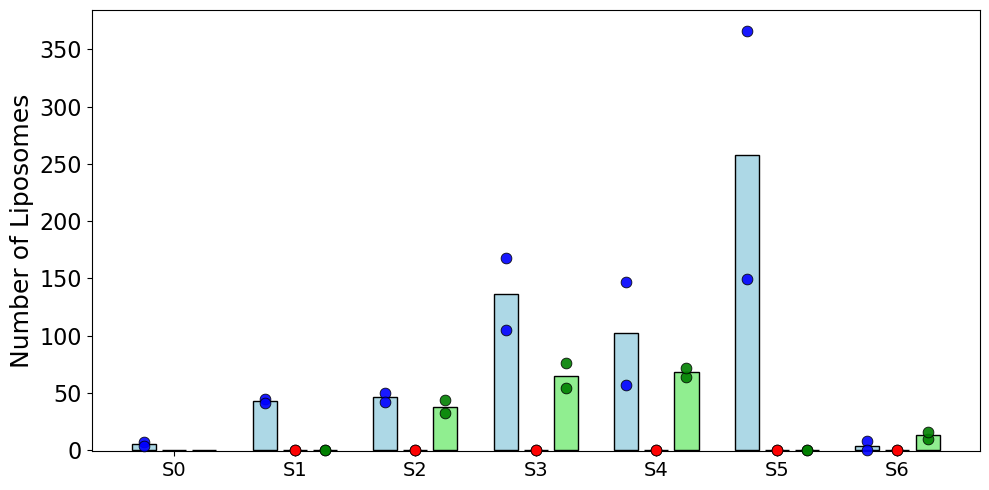

In [142]:
plt.figure(figsize=(10, 5))

bar_palette = {"ori": "#add8e6", "smi": "#ff9999", "dis": "#90ee90"}
dot_palette = {"ori": "blue", "smi": "red", "dis": "green"}

type_order = ["ori", "smi", "dis"]
sample_order = sorted(df_plot["sample_index"].unique())
bar_width = 0.6
bar_dodge = 0.25 

offsets = {
    "ori": -bar_dodge,
    "smi": 0,
    "dis": +bar_dodge,
}

# Barplot
for i, t in enumerate(type_order):
    sub = df_avg_full[df_avg_full["type"] == t]
    plt.bar(
        sub["sample_index"] + offsets[t],
        sub["num_vesicles"],
        width=bar_width / len(type_order),
        color=bar_palette[t],
        edgecolor="k",
        label=t if i == 0 else None, 
        zorder=2
    )

# Stripplot 
for t in type_order:
    sub = df_plot[df_plot["type"] == t]
    plt.scatter(
        sub["sample_index"] + offsets[t],
        sub["num_vesicles"],
        color=dot_palette[t],
        s=60,
        edgecolor="k",
        linewidth=0.6,
        alpha=0.9,
        clip_on=False,
        zorder=3
    )

plt.xlabel("")
plt.ylabel("Number of Liposomes", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(sample_order, [f"S{i}" for i in sample_order], fontsize=14)
plt.ylim(-1, 384.3)
plt.tight_layout()
plt.savefig("../../results/sample144_conc_sweep.png", dpi=600, bbox_inches="tight")
plt.show()

In [77]:
df_plot["num_vesicles"].max() * 1.05

384.3

In [ ]:
sample288_names = df_name[df_name["names"].str.contains("sample288")]["names"].tolist()
df_plot = df_final[df_final["names"].isin(sample288_names)].copy()

def sample_type(name):
    if "ori" in name:
        return "ori"
    elif "smi" in name:
        return "smi"
    elif "dis" in name:
        return "dis"
    else:
        return "other"

df_plot["type"] = df_plot["names"].apply(sample_type)

df_avg = df_plot.groupby(["names", "type"], as_index=False)["num_vesicles"].mean()

type_colors = {"ori": "blue", "smi": "red", "dis": "green"}
bar_colors = {"ori": "#add8e6",  # light blue
              "smi": "#ff9999",  # light red/pink
              "dis": "#90ee90"}  # light green

In [ ]:
df_plot = df_plot.copy()
df_plot["sample_index"] = df_plot["names"].str.extract(r"_(\d+)$").astype(int)

type_order = ["ori", "smi", "dis"]
sample_order = sorted(df_plot["sample_index"].unique())  

df_avg = df_plot.groupby(["sample_index", "type"], as_index=False)["num_vesicles"].mean()

full_index = pd.MultiIndex.from_product([sample_order, type_order], names=["sample_index", "type"])
df_avg_full = df_avg.set_index(["sample_index", "type"]).reindex(full_index).reset_index()

df_avg_full["num_vesicles"] = df_avg_full["num_vesicles"].fillna(0)

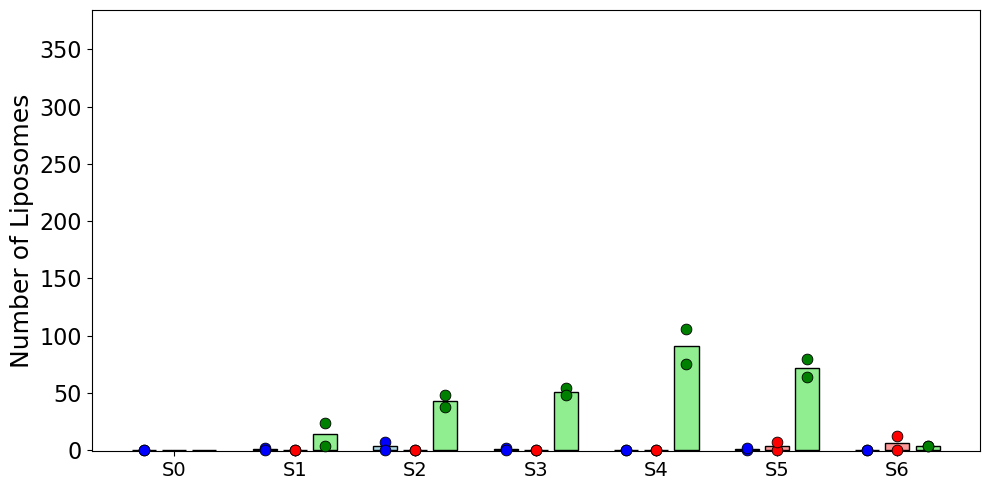

In [134]:
plt.figure(figsize=(10, 5))

bar_palette = {"ori": "#add8e6", "smi": "#ff9999", "dis": "#90ee90"}
dot_palette = {"ori": "blue", "smi": "red", "dis": "green"}

type_order = ["ori", "smi", "dis"]
sample_order = sorted(df_plot["sample_index"].unique())
bar_width = 0.6
bar_dodge = 0.25  

offsets = {
    "ori": -bar_dodge,
    "smi": 0,
    "dis": +bar_dodge,
}

for i, t in enumerate(type_order):
    sub = df_avg_full[df_avg_full["type"] == t]
    plt.bar(
        sub["sample_index"] + offsets[t],
        sub["num_vesicles"],
        width=bar_width / len(type_order),
        color=bar_palette[t],
        edgecolor="k",
        label=t if i == 0 else None,  # single legend entry
        zorder=2
    )

for t in type_order:
    sub = df_plot[df_plot["type"] == t]
    plt.scatter(
        sub["sample_index"] + offsets[t],
        sub["num_vesicles"],
        color=dot_palette[t],
        s=60,
        edgecolor="k",
        linewidth=0.6,
        zorder=3,
        clip_on=False
    )

plt.xlabel("")
plt.ylabel("Number of Liposomes", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(sample_order, [f"S{i}" for i in sample_order], fontsize=14)
plt.ylim(-1, 384.3)
plt.tight_layout()
plt.savefig("../../results/sample288_conc_sweep.png", dpi=600, bbox_inches="tight")

plt.show()